In [ ]:
# Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:
#
# problema 1 - durata anilor de studii universitare, vechimea in programare
# problema 2 - valorile pixelilor din imagini
# problema 3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.

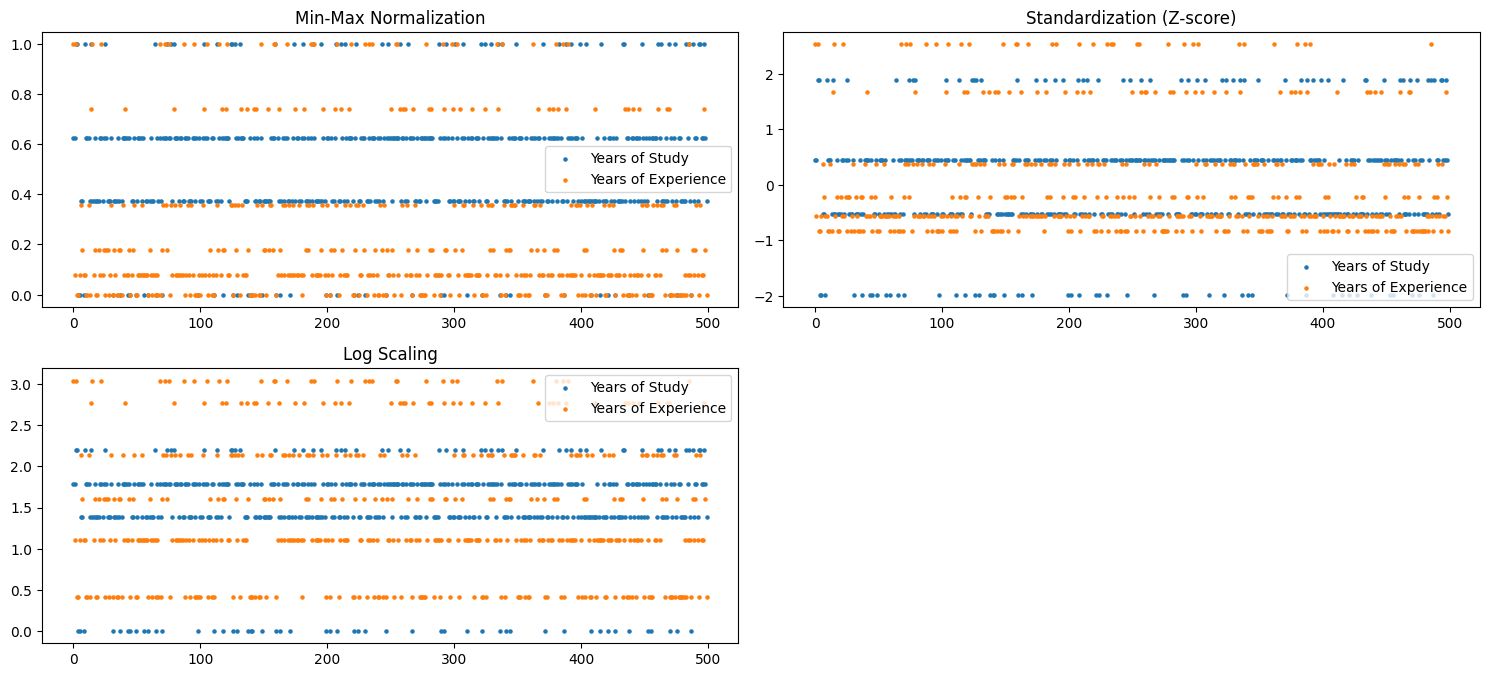

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the survey data
survey_data = pd.read_csv("data/surveyDataSience.csv", header=[0,1], low_memory=False)
survey_data.columns = survey_data.columns.get_level_values(0)
survey_data = survey_data[1:].reset_index(drop=True)

# Map education levels to years of study
education_years_mapping = {
    "Bachelor’s degree": 3,
    "Master’s degree": 5,
    "Doctoral degree": 8,
    "Professional doctorate": 8,
    "Some college/university study without earning a bachelor’s degree": 0,
    "I prefer not to answer": 0,
    "No formal education past high school": 0
}
survey_data['years_of_study'] = survey_data['Q4'].map(education_years_mapping).astype(float)

# Map experience levels to years of experience
experience_years_mapping = {
    '< 1 years': 0.5,
    '1-3 years': 2,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 20,
}
survey_data['years_of_experience'] = survey_data['Q6'].map(experience_years_mapping).astype(float)

# Select the columns to normalize
columns_to_normalize = survey_data[['years_of_study', 'years_of_experience']].dropna().iloc[:500]

# Min-Max Normalization
def min_max_normalization(column):
    return (column - column.min()) / (column.max() - column.min())

normalized_study_years_minmax = min_max_normalization(columns_to_normalize['years_of_study'])
normalized_experience_years_minmax = min_max_normalization(columns_to_normalize['years_of_experience'])

# Standardization (Z-score)
def z_score_standardization(column):
    return (column - column.mean()) / column.std()

standardized_study_years = z_score_standardization(columns_to_normalize['years_of_study'])
standardized_experience_years = z_score_standardization(columns_to_normalize['years_of_experience'])

# Log Scaling
def log_scaling(column):
    return np.log1p(column)  # log(x + 1)

log_scaled_study_years = log_scaling(columns_to_normalize['years_of_study'])
log_scaled_experience_years = log_scaling(columns_to_normalize['years_of_experience'])

# Plot the normalized data
plt.figure(figsize=(15, 10))

# Min-Max Normalization
plt.subplot(3, 2, 1)
plt.scatter(range(len(normalized_study_years_minmax)), normalized_study_years_minmax, label="Years of Study", s=5)
plt.scatter(range(len(normalized_experience_years_minmax)), normalized_experience_years_minmax, label="Years of Experience", s=5)
plt.title('Min-Max Normalization')
plt.legend()

# Standardization
plt.subplot(3, 2, 2)
plt.scatter(range(len(standardized_study_years)), standardized_study_years, label="Years of Study", s=5)
plt.scatter(range(len(standardized_experience_years)), standardized_experience_years, label="Years of Experience", s=5)
plt.title('Standardization (Z-score)')
plt.legend()

# Log Scaling
plt.subplot(3, 2, 3)
plt.scatter(range(len(log_scaled_study_years)), log_scaled_study_years, label="Years of Study", s=5)
plt.scatter(range(len(log_scaled_experience_years)), log_scaled_experience_years, label="Years of Experience", s=5)
plt.title('Log Scaling')
plt.legend()

plt.tight_layout()
plt.show()

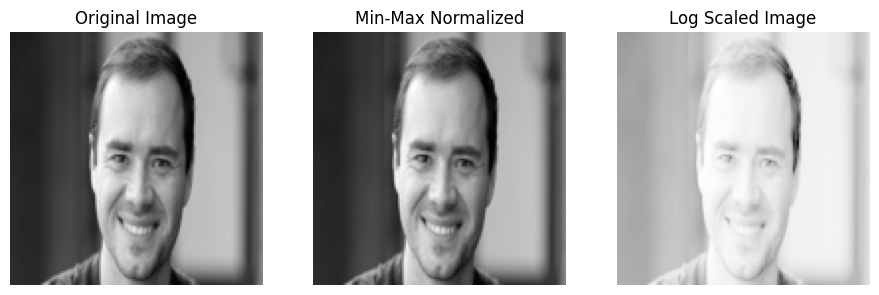

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Folder containing the images
image_directory = "data/images"
image_files = [file for file in os.listdir(image_directory) if file.endswith(('jpg', 'png', 'jpeg'))]

# Load the first image
image_path = os.path.join(image_directory, image_files[0])
image = Image.open(image_path)

# Resize the image to 128x128 pixels
resized_image = image.resize((128, 128))

# Convert the image to grayscale
grayscale_image = resized_image.convert('L')
image_array = np.array(grayscale_image)

# 1. Min-Max Scaling
def min_max_scaling(image_array):
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    return (image_array - min_val) / (max_val - min_val)

normalized_image_min_max = min_max_scaling(image_array)

# 2. Log Scaling
def log_scaling(image_array):
    return np.log1p(image_array)  # Log(x + 1)

normalized_image_log = log_scaling(image_array)

# Plot the original and normalized images
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 4, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Min-Max Normalized Image
plt.subplot(2, 4, 2)
plt.imshow(normalized_image_min_max, cmap='gray')
plt.title("Min-Max Normalized")
plt.axis('off')

# Log Scaled Image
plt.subplot(2, 4, 3)
plt.imshow(normalized_image_log, cmap='gray')
plt.title("Log Scaled Image")
plt.axis('off')

plt.show()

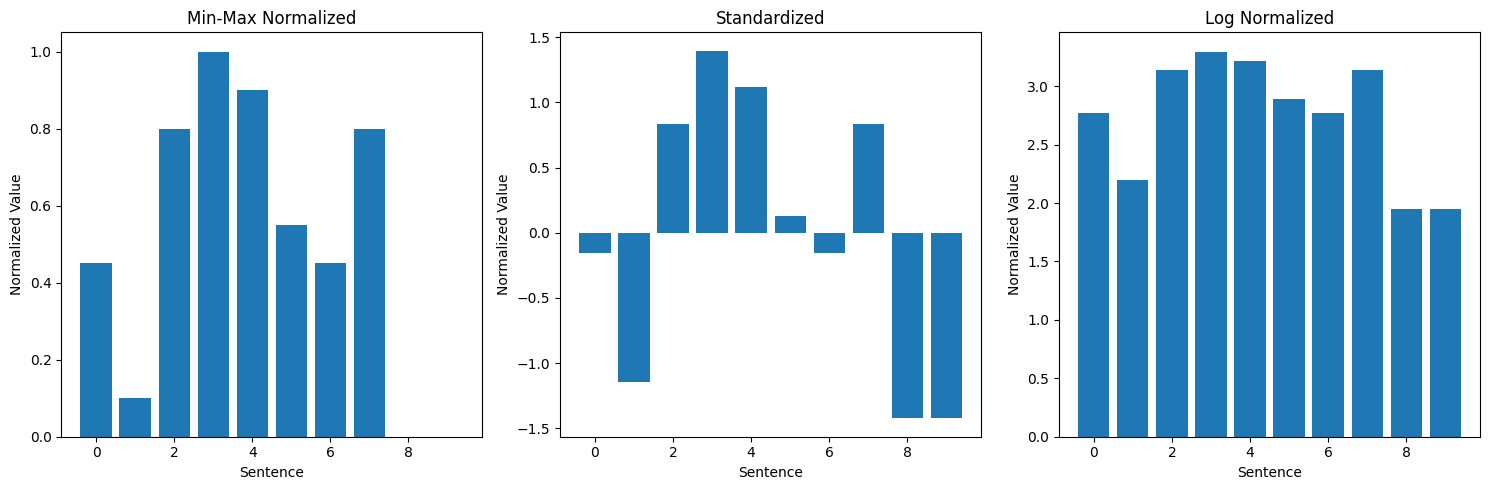

In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Load the text from the file
with open('data/texts.txt', 'r', encoding='utf-8') as file:
    text_content = file.read()

# Split the text into sentences
sentences_list = re.split(r'[.!?]', text_content)

# Count the number of words in each sentence
word_count_per_sentence = [len(sentence.split()) for sentence in sentences_list if sentence]

# 1. Min-Max Normalization
def min_max_normalization(word_counts):
    min_count = np.min(word_counts)
    max_count = np.max(word_counts)
    return [(count - min_count) / (max_count - min_count) for count in word_counts]

normalized_word_counts_min_max = min_max_normalization(word_count_per_sentence)

# 2. Standardization
def standardization(word_counts):
    mean_count = np.mean(word_counts)
    std_count = np.std(word_counts)
    return [(count - mean_count) / std_count for count in word_counts]

standardized_word_counts = standardization(word_count_per_sentence)

# 3. Log Scaling
def log_scaling(word_counts):
    return [np.log1p(count) for count in word_counts]

log_scaled_word_counts = log_scaling(word_count_per_sentence)

# Plot the normalized data
plt.figure(figsize=(15, 5))

# Min-Max Normalization
plt.subplot(1, 3, 1)
plt.bar(range(len(word_count_per_sentence)), normalized_word_counts_min_max)
plt.title('Min-Max Normalized')
plt.xlabel('Sentence')
plt.ylabel('Normalized Value')

# Standardization
plt.subplot(1, 3, 2)
plt.bar(range(len(word_count_per_sentence)), standardized_word_counts)
plt.title('Standardized')
plt.xlabel('Sentence')
plt.ylabel('Normalized Value')

# Log Scaling
plt.subplot(1, 3, 3)
plt.bar(range(len(word_count_per_sentence)), log_scaled_word_counts)
plt.title('Log Normalized')
plt.xlabel('Sentence')
plt.ylabel('Normalized Value')

plt.tight_layout()
plt.show()